http://pandas.pydata.org/pandas-docs/stable/10min.html

# Pandas em 10 minutos

Essa é uma introdução curta ao Pandas, gera

Esta é uma breve introdução aos pandas, voltada principalmente para novos usuários. Você pode ver instruções mais complexas no [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

##Importação

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

## Criação de objetos


Criar uma série passando uma lista de valores, permitindo que o pandas crie um índice inteiro padrão:

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8])

In [ ]:
np.array([1,3,5,np.nan,6,8])

array([ 1.,  3.,  5., nan,  6.,  8.])

In [ ]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Criação de um DataFrame passando uma matriz numpy com um índice datetime e colunas rotuladas:

In [ ]:
dates = pd.date_range(pd.to_datetime("2021-01-01"), periods=6)

In [ ]:
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list(['A','B','C','D']))
df

,A,B,C,D
2021-01-01,0.607472,-1.114383,-0.015869,0.093837
2021-01-02,-0.152781,-2.742377,0.197817,-0.331538
2021-01-03,1.301113,-0.176526,-0.169945,-1.289765
2021-01-04,-1.764057,-0.193967,1.654969,0.270894
2021-01-05,0.380441,0.910793,2.926295,0.568916
2021-01-06,-0.188359,0.231448,1.044600,-1.303898


Criando um DataFrame passando um dicionário de objetos que podem ser convertidos para séries.

In [ ]:
df2 = pd.DataFrame({'C1':1.,
                   'C2':pd.Timestamp('20210102'),
                   'C3':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'C4':np.array([3]*4,dtype='int32'),
                   'C5':pd.Categorical(["test","train","test","train"]),
                   'C6':'foo',
                   'Coluna 7': 2})

df2

,C1,C2,C3,C4,C5,C6,Coluna 7
0,1.0,2021-01-02,1.0,3,test,foo,2
1,1.0,2021-01-02,1.0,3,train,foo,2
2,1.0,2021-01-02,1.0,3,test,foo,2
3,1.0,2021-01-02,1.0,3,train,foo,2


Conheça outros dtypes [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes)

In [ ]:
df2.dtypes

C1           float64
C2    datetime64[ns]
C3           float32
C4             int32
C5          category
C6            object
dtype: object

Se você estiver usando IPython, o preenchimento de tabulação para nomes de colunas (bem como atributos públicos) é habilitado automaticamente. Teste abaixo:

In [ ]:
df2["Coluna 7"]

0    2
1    2
2    2
3    2
Name: Coluna 7, dtype: int64

In [ ]:
# df2.<TAB> ou Ctrl + ESPAÇO no colab.
df2.C1
df2[['C1',"Coluna 7"]]

,C1,Coluna 7
0,1.0,2
1,1.0,2
2,1.0,2
3,1.0,2


### Para mais detalhes sobre as estruturas de dados fornecidas pelo Pandas [ clique aqui](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro).

## Visualizando dados


See the top & bottom rows of the frame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [ ]:
df.head()

,A,B,C,D
2021-01-01,0.607472,-1.114383,-0.015869,0.093837
2021-01-02,-0.152781,-2.742377,0.197817,-0.331538
2021-01-03,1.301113,-0.176526,-0.169945,-1.289765
2021-01-04,-1.764057,-0.193967,1.654969,0.270894
2021-01-05,0.380441,0.910793,2.926295,0.568916


In [ ]:
df.tail(3)

,A,B,C,D
2021-01-04,-1.764057,-0.193967,1.654969,0.270894
2021-01-05,0.380441,0.910793,2.926295,0.568916
2021-01-06,-0.188359,0.231448,1.044600,-1.303898


Display the index, columns, and the underlying numpy data

In [ ]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns = ['A', 'B', 'C', 'D']
df

,A,B,C,D
1,-0.284214,-0.359876,0.034263,0.489893
2,1.523510,-1.237274,0.981602,-1.926444
3,1.312841,0.262637,-2.314506,0.331363
4,-0.796425,0.267239,0.427246,-0.937452
5,-1.097423,-0.448137,0.185382,-0.738703
6,-0.023116,-0.824322,0.757760,-0.099923


In [ ]:
df.values

array([[ 0.32271443, -0.57216631,  0.46152423, -1.2940445 ],
       [-0.17344256, -0.6778891 ,  0.84233112,  1.75192722],
       [ 1.04096631, -0.04253173,  1.8867164 , -0.0079583 ],
       [-1.25055618, -0.18851972, -0.64084143,  0.94877284],
       [ 1.0565634 ,  2.09059104, -0.35088588, -1.53526585],
       [-0.55377477,  1.083263  ,  0.92277124,  0.79531827]])

Describe shows a quick statistic summary of your data

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.560569,-0.260155,0.042856,-0.111459
std,0.960686,1.604088,1.023413,1.250456
min,-1.737754,-2.782568,-1.627366,-1.529945
25%,-1.326706,-1.059930,-0.332848,-1.074670
50%,-0.475772,-0.036480,0.115470,-0.276245
75%,0.311612,0.994159,0.631243,0.815652
max,0.362159,1.357975,1.332683,1.574877


Transposing your data

In [ ]:
df.T

,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06
A,0.607472,-0.152781,1.301113,-1.764057,0.380441,-0.188359
B,-1.114383,-2.742377,-0.176526,-0.193967,0.910793,0.231448
C,-0.015869,0.197817,-0.169945,1.654969,2.926295,1.044600
D,0.093837,-0.331538,-1.289765,0.270894,0.568916,-1.303898


Sorting by value

In [ ]:
df.sort_values(by=['B'])

,A,B,C,D
2021-01-02,-0.152781,-2.742377,0.197817,-0.331538
2021-01-01,0.607472,-1.114383,-0.015869,0.093837
2021-01-04,-1.764057,-0.193967,1.654969,0.270894
2021-01-03,1.301113,-0.176526,-0.169945,-1.289765
2021-01-06,-0.188359,0.231448,1.044600,-1.303898
2021-01-05,0.380441,0.910793,2.926295,0.568916


In [ ]:
df.sort_values(by=['B','C'])

,A,B,C,D
2021-01-02,-0.152781,-2.742377,0.197817,-0.331538
2021-01-01,0.607472,-1.114383,-0.015869,0.093837
2021-01-04,-1.764057,-0.193967,1.654969,0.270894
2021-01-03,1.301113,-0.176526,-0.169945,-1.289765
2021-01-06,-0.188359,0.231448,1.044600,-1.303898
2021-01-05,0.380441,0.910793,2.926295,0.568916


### Conheça mais funções acessando na seção de [noções básicas do Pandas](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics).

## Selection

Observação: embora as expressões Python / Numpy padrão para seleção e configuração sejam intuitivas e úteis para trabalho interativo, para código de produção, os métodos de acesso de dados otimizados do pandas, .at, .iat, .loc, .iloc e .ix são mais recomendados.

Veja as seções de indexação do pandas [Indexando e Selecionando Dados](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) e [Indexação Avançada](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Obtendo dados

Selecionar uma única coluna, o que resulta em uma série, equivalente a df.A

In [ ]:
df['A']

2021-01-01    0.322714
2021-01-02   -0.173443
2021-01-03    1.040966
2021-01-04   -1.250556
2021-01-05    1.056563
2021-01-06   -0.553775
Freq: D, Name: A, dtype: float64

Selecionando via [].

In [ ]:
df[0:3]

,A,B,C,D
2021-01-01,0.362159,-1.140712,-1.627366,-1.166057
2021-01-02,-1.398138,1.357975,1.332683,-0.800510
2021-01-03,-1.112411,1.077338,0.279864,1.574877


In [ ]:
df['20210102':'20210104']

,A,B,C,D
2021-01-02,-0.173443,-0.677889,0.842331,1.751927
2021-01-03,1.040966,-0.042532,1.886716,-0.007958
2021-01-04,-1.250556,-0.188520,-0.640841,0.948773


### Seleção por rótulo


Selecionando pelo índice da linha

In [ ]:
dates[0]

Timestamp('2021-01-01 00:00:00', freq='D')

In [ ]:
df.loc[dates[0]]

A    0.322714
B   -0.572166
C    0.461524
D   -1.294045
Name: 2021-01-01 00:00:00, dtype: float64

Selecionando pelo rótulo da coluna

In [ ]:
df.loc[:,['A','B']]


,A,B
2021-01-01,0.322714,-0.572166
2021-01-02,-0.173443,-0.677889
2021-01-03,1.040966,-0.042532
2021-01-04,-1.250556,-0.188520
2021-01-05,1.056563,2.090591
2021-01-06,-0.553775,1.083263


In [ ]:
df.loc['20210102':'20210104',['A','B']]


,A,B
2021-01-02,-1.398138,1.357975
2021-01-03,-1.112411,1.077338
2021-01-04,0.160868,-0.817583


Reduzindo as dimensões de uma instância

In [ ]:
df.loc['20210102',['A','B']]

A   -1.398138
B    1.357975
Name: 2021-01-02 00:00:00, dtype: float64

Selecionando uma célula

In [ ]:
df.loc[dates[0],'A']

0.32271443062901695

### Seleção por posição

In [ ]:
df.iloc[3]

A   -1.250556
B   -0.188520
C   -0.640841
D    0.948773
Name: 2021-01-04 00:00:00, dtype: float64

In [ ]:
df.iloc[3:5,0:2]

,A,B
2021-01-04,-1.250556,-0.188520
2021-01-05,1.056563,2.090591


In [ ]:
df.iloc[[1,2,4],[0,2]]

,A,C
2021-01-02,-0.173443,0.842331
2021-01-03,1.040966,1.886716
2021-01-05,1.056563,-0.350886


In [ ]:
df.iloc[1:3,:]

,A,B,C,D
2021-01-02,-1.398138,1.357975,1.332683,-0.800510
2021-01-03,-1.112411,1.077338,0.279864,1.574877


In [ ]:
df.iloc[:,1:3]

,B,C
2021-01-01,-1.140712,-1.627366
2021-01-02,1.357975,1.332683
2021-01-03,1.077338,0.279864
2021-01-04,-0.817583,0.748370
2021-01-05,-2.782568,-0.048924
2021-01-06,0.744623,-0.427489


In [ ]:
df.iloc[1,1]

-0.677889102872932

In [ ]:
df.iat[1,1]

-0.677889102872932

### Veja mais opções [aqui](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

## Indexação booleana

In [ ]:
df

,A,B,C,D
2021-01-01,0.362159,-1.140712,-1.627366,-1.166057
2021-01-02,-1.398138,1.357975,1.332683,-0.800510
2021-01-03,-1.112411,1.077338,0.279864,1.574877
2021-01-04,0.160868,-0.817583,0.748370,0.248021
2021-01-05,0.361861,-2.782568,-0.048924,-1.529945
2021-01-06,-1.737754,0.744623,-0.427489,1.004862


In [ ]:
df_tst = df.copy()

In [ ]:
indices = df_tst.A < 0

In [ ]:
df_tst.A[df_tst.A < 0]

2021-01-02   -0.152781
2021-01-04   -1.764057
2021-01-06   -0.188359
Name: A, dtype: float64

In [ ]:
df_tst[df_tst.A < 0].A

2021-01-02   -0.152781
2021-01-04   -1.764057
2021-01-06   -0.188359
Freq: 2D, Name: A, dtype: float64

In [ ]:
df_tst.A[df_tst.A < 0] = -df_tst[df_tst.A < 0].A

In [ ]:
df_tst

,A,B,C,D
2021-01-01,0.607472,-1.114383,-0.015869,0.093837
2021-01-02,0.152781,-2.742377,0.197817,-0.331538
2021-01-03,1.301113,-0.176526,-0.169945,-1.289765
2021-01-04,1.764057,-0.193967,1.654969,0.270894
2021-01-05,0.380441,0.910793,2.926295,0.568916
2021-01-06,0.188359,0.231448,1.044600,-1.303898


In [ ]:
df.A > 0

2021-01-01     True
2021-01-02    False
2021-01-03     True
2021-01-04    False
2021-01-05     True
2021-01-06    False
Freq: D, Name: A, dtype: bool

In [ ]:
df[df.A > 0]

,A,B,C,D
2021-01-01,0.362159,-1.140712,-1.627366,-1.166057
2021-01-04,0.160868,-0.817583,0.748370,0.248021
2021-01-05,0.361861,-2.782568,-0.048924,-1.529945


In [ ]:
df > 0

,A,B,C,D
2021-01-01,True,False,False,False
2021-01-02,False,True,True,False
2021-01-03,False,True,True,True
2021-01-04,True,False,True,True
2021-01-05,True,False,False,False
2021-01-06,False,True,False,True


In [ ]:
df[df > 0]

,A,B,C,D
2021-01-01,0.362159,NaN,NaN,NaN
2021-01-02,NaN,1.357975,1.332683,NaN
2021-01-03,NaN,1.077338,0.279864,1.574877
2021-01-04,0.160868,NaN,0.748370,0.248021
2021-01-05,0.361861,NaN,NaN,NaN
2021-01-06,NaN,0.744623,NaN,1.004862


Utilizando o operador isin()

In [ ]:
df2 = df.copy()

In [ ]:
df2['E'] = ['one','one', 'two','three','four','three']

In [ ]:
df2

,A,B,C,D,E
2021-01-01,0.362159,-1.140712,-1.627366,-1.166057,one
2021-01-02,-1.398138,1.357975,1.332683,-0.800510,one
2021-01-03,-1.112411,1.077338,0.279864,1.574877,two
2021-01-04,0.160868,-0.817583,0.748370,0.248021,three
2021-01-05,0.361861,-2.782568,-0.048924,-1.529945,four
2021-01-06,-1.737754,0.744623,-0.427489,1.004862,three


In [ ]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2021-01-03,-1.112411,1.077338,0.279864,1.574877,two
2021-01-05,0.361861,-2.782568,-0.048924,-1.529945,four


## Setting

Definir uma nova coluna alinha automaticamente os dados pelos índices

In [ ]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20210102',periods=6))

In [ ]:
s1

2021-01-02    1
2021-01-03    2
2021-01-04    3
2021-01-05    4
2021-01-06    5
2021-01-07    6
Freq: D, dtype: int64

In [ ]:
df['F'] = s1

In [ ]:
df

,A,B,C,D,F
2021-01-01,0.362159,-1.140712,-1.627366,-1.166057,NaN
2021-01-02,-1.398138,1.357975,1.332683,-0.800510,1.0
2021-01-03,-1.112411,1.077338,0.279864,1.574877,2.0
2021-01-04,0.160868,-0.817583,0.748370,0.248021,3.0
2021-01-05,0.361861,-2.782568,-0.048924,-1.529945,4.0
2021-01-06,-1.737754,0.744623,-0.427489,1.004862,5.0


Definindo valores pelo rótulo

In [ ]:
dates[0]

Timestamp('2021-01-01 00:00:00', freq='D')

In [ ]:
df.at[dates[0],'A'] = 0

In [ ]:
df

,A,B,C,D,F
2021-01-01,0.000000,-1.140712,-1.627366,-1.166057,NaN
2021-01-02,-1.398138,1.357975,1.332683,-0.800510,1.0
2021-01-03,-1.112411,1.077338,0.279864,1.574877,2.0
2021-01-04,0.160868,-0.817583,0.748370,0.248021,3.0
2021-01-05,0.361861,-2.782568,-0.048924,-1.529945,4.0
2021-01-06,-1.737754,0.744623,-0.427489,1.004862,5.0


Definindo valores pela posição

In [ ]:
df.iat[0,1] = 0

Definir atribuindo com uma matriz numpy

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 5 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
F    5 non-null float64
dtypes: float64(5)
memory usage: 448.0 bytes


In [ ]:
np.array([5] * len(df))

array([5, 5, 5, 5, 5, 5])

In [ ]:
df.loc[:,'D'] = np.array([5] * len(df))

In [ ]:
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-1.627366,5,NaN
2021-01-02,-1.398138,1.357975,1.332683,5,1.0
2021-01-03,-1.112411,1.077338,0.279864,5,2.0
2021-01-04,0.160868,-0.817583,0.748370,5,3.0
2021-01-05,0.361861,-2.782568,-0.048924,5,4.0
2021-01-06,-1.737754,0.744623,-0.427489,5,5.0


Definindo valores com expressões booleanas

In [ ]:
df2 = df.copy()

In [ ]:
df2[df2 > 0] = -df2

In [ ]:
df2

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-1.627366,-5,NaN
2021-01-02,-1.398138,-1.357975,-1.332683,-5,-1.0
2021-01-03,-1.112411,-1.077338,-0.279864,-5,-2.0
2021-01-04,-0.160868,-0.817583,-0.748370,-5,-3.0
2021-01-05,-0.361861,-2.782568,-0.048924,-5,-4.0
2021-01-06,-1.737754,-0.744623,-0.427489,-5,-5.0


In [ ]:
df.iat[0,0] = 0

df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-1.627366,5,NaN
2021-01-02,-1.398138,1.357975,1.332683,5,1.0
2021-01-03,-1.112411,1.077338,0.279864,5,2.0
2021-01-04,0.160868,-0.817583,0.748370,5,3.0
2021-01-05,0.361861,-2.782568,-0.048924,5,4.0
2021-01-06,-1.737754,0.744623,-0.427489,5,5.0


In [ ]:
df[df < 0].A = -df[df < 0].A
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-1.627366,5,NaN
2021-01-02,-1.398138,1.357975,1.332683,5,1.0
2021-01-03,-1.112411,1.077338,0.279864,5,2.0
2021-01-04,0.160868,-0.817583,0.748370,5,3.0
2021-01-05,0.361861,-2.782568,-0.048924,5,4.0
2021-01-06,-1.737754,0.744623,-0.427489,5,5.0


## Dados ausentes
O pandas usa principalmente o valor np.nan para representar dados ausentes. Por padrão, ele não é incluído nos cálculos. 

A reindexação permite que você altere / adicione / exclua o índice em um eixo especificado. Isso retorna uma cópia dos dados.

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [ ]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [ ]:
df1

,A,B,C,D,F,E
2021-01-01,0.322714,-0.572166,0.461524,5,NaN,1.0
2021-01-02,-0.173443,-0.677889,0.842331,5,1.0,1.0
2021-01-03,1.040966,-0.042532,1.886716,5,2.0,NaN
2021-01-04,-1.250556,-0.188520,-0.640841,5,3.0,NaN


Deletar qualquer linha que possua dados ausentes.

In [ ]:
df1.dropna(how='any')

,A,B,C,D,F,E
2021-01-02,-1.398138,1.357975,1.332683,5,1.0,1.0


In [ ]:
df1

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,-1.627366,5,NaN,1.0
2021-01-02,-1.398138,1.357975,1.332683,5,1.0,1.0
2021-01-03,-1.112411,1.077338,0.279864,5,2.0,NaN
2021-01-04,0.160868,-0.817583,0.748370,5,3.0,NaN


Preenchendo dados ausentes

In [ ]:
df1.fillna(value=5)

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,-1.627366,5,5.0,1.0
2021-01-02,-1.398138,1.357975,1.332683,5,1.0,1.0
2021-01-03,-1.112411,1.077338,0.279864,5,2.0,5.0
2021-01-04,0.160868,-0.817583,0.748370,5,3.0,5.0


In [ ]:
df1.fillna(df1.mean())


,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,-1.627366,5,2.0,1.0
2021-01-02,-1.398138,1.357975,1.332683,5,1.0,1.0
2021-01-03,-1.112411,1.077338,0.279864,5,2.0,1.0
2021-01-04,0.160868,-0.817583,0.748370,5,3.0,1.0


Contabilizando o número de dados ausentes

In [ ]:
df1.isna().sum()

A    0
B    0
C    0
D    0
F    1
E    2
dtype: int64

### Veja mais sobre dados ausentes no pandas [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

## Operações

### Estatísticas

As operações em geral excluem dados ausentes.

Executando uma estatística descritiva

In [ ]:
df.mean()

A   -0.620929
B   -0.070036
C    0.042856
D    5.000000
F    3.000000
dtype: float64

Mesma operação no outro eixo

In [ ]:
df.mean(axis=0)

A   -0.620929
B   -0.070036
C    0.042856
D    5.000000
F    3.000000
dtype: float64

Operar com objetos que possuem dimensionalidade diferente e precisam de alinhamento. Além disso, o pandas transmite automaticamente ao longo da dimensão especificada.

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2021-01-01    NaN
2021-01-02    NaN
2021-01-03    1.0
2021-01-04    3.0
2021-01-05    5.0
2021-01-06    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis='index')

,A,B,C,D,F
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN
2021-01-03,-2.112411,0.077338,-0.720136,4.0,1.0
2021-01-04,-2.839132,-3.817583,-2.251630,2.0,0.0
2021-01-05,-4.638139,-7.782568,-5.048924,0.0,-1.0
2021-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Aplicando funções aos dados

In [ ]:
df.apply(np.cumsum)

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-1.627366,5,NaN
2021-01-02,-1.398138,1.357975,-0.294684,10,1.0
2021-01-03,-2.510549,2.435312,-0.014819,15,3.0
2021-01-04,-2.349682,1.617729,0.733550,20,6.0
2021-01-05,-1.987821,-1.164839,0.684626,25,10.0
2021-01-06,-3.725575,-0.420216,0.257137,30,15.0


In [ ]:
df.apply(lambda x: x+10)

,A,B,C,D,F
2021-01-01,10.000000,10.000000,8.372634,15,NaN
2021-01-02,8.601862,11.357975,11.332683,15,11.0
2021-01-03,8.887589,11.077338,10.279864,15,12.0
2021-01-04,10.160868,9.182417,10.748370,15,13.0
2021-01-05,10.361861,7.217432,9.951076,15,14.0
2021-01-06,8.262246,10.744623,9.572511,15,15.0


In [ ]:
df.apply(lambda x: x.max() - x.min())

A    2.099615
B    4.140543
C    2.960049
D    0.000000
F    4.000000
dtype: float64

### Histograma

Veja mais sobre histogramas e discretização [aqui](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    2
2    4
3    4
4    2
5    4
6    3
7    0
8    1
9    4
dtype: int64

In [ ]:
s.value_counts()

4    5
2    2
3    1
1    1
0    1
dtype: int64

In [ ]:
s.mode()

0    4
dtype: int64

### Métodos de String

A classe pandas.Series é equipada com um conjunto de métodos de processamento de string no atributo str que facilita a operação em cada elemento da matriz, como no trecho de código abaixo. Observe que a correspondência de padrões em str geralmente usa [expressões regulares](https://docs.python.org/2/library/re.html) por padrão (e em alguns casos sempre os usa). Veja mais sobre isso [aqui](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [ ]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Junção de dados (merge)

### Concat

O pandas fornece vários recursos para combinar facilmente objetos do tipo Series ou DataFrame. Veja mais sobre o assunto [aqui](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenando objetos pandas com a função [concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html):

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.822681,0.105498,-0.880144,0.624851
1,-0.122335,0.420090,0.226788,-0.976632
2,-0.881455,-0.338627,-1.565977,-0.565096
3,-0.588502,0.329187,0.480840,0.528021
4,-0.100207,-0.167735,-0.400072,-0.879844
5,1.948331,-1.821540,2.259392,0.878093
6,0.043457,-0.576342,0.716589,0.226333
7,0.226104,-0.198665,-0.118780,1.081068
8,-2.107969,0.964420,-1.612563,-2.063254
9,0.544788,-0.104359,0.549531,-0.294255


In [ ]:
# separando pem pedaços
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.822681  0.105498 -0.880144  0.624851
 1 -0.122335  0.420090  0.226788 -0.976632
 2 -0.881455 -0.338627 -1.565977 -0.565096,
           0         1         2         3
 3 -0.588502  0.329187  0.480840  0.528021
 4 -0.100207 -0.167735 -0.400072 -0.879844
 5  1.948331 -1.821540  2.259392  0.878093
 6  0.043457 -0.576342  0.716589  0.226333,
           0         1         2         3
 7  0.226104 -0.198665 -0.118780  1.081068
 8 -2.107969  0.964420 -1.612563 -2.063254
 9  0.544788 -0.104359  0.549531 -0.294255]

In [ ]:
pd.concat(pieces)

,0,1,2,3
0,-0.822681,0.105498,-0.880144,0.624851
1,-0.122335,0.420090,0.226788,-0.976632
2,-0.881455,-0.338627,-1.565977,-0.565096
3,-0.588502,0.329187,0.480840,0.528021
4,-0.100207,-0.167735,-0.400072,-0.879844
5,1.948331,-1.821540,2.259392,0.878093
6,0.043457,-0.576342,0.716589,0.226333
7,0.226104,-0.198665,-0.118780,1.081068
8,-2.107969,0.964420,-1.612563,-2.063254
9,0.544788,-0.104359,0.549531,-0.294255


### Append

A função [append()](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation) adiciona linhas ao DataFrame.

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.228773,0.675981,-1.556783,-1.368156
1,1.343811,2.034173,1.342487,0.046779
2,0.297079,0.336546,0.190927,-0.598467
3,-1.059843,-2.094762,-0.233837,1.100466
4,1.835650,-2.704121,0.783679,0.726539
5,-0.968118,1.510893,-2.037371,-0.539794
6,1.148837,0.829680,0.418864,0.037541
7,0.576737,-0.504965,1.383578,0.208051


In [ ]:
s = df.iloc[3]
s

A   -1.059843
B   -2.094762
C   -0.233837
D    1.100466
Name: 3, dtype: float64

In [ ]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.228773,0.675981,-1.556783,-1.368156
1,1.343811,2.034173,1.342487,0.046779
2,0.297079,0.336546,0.190927,-0.598467
3,-1.059843,-2.094762,-0.233837,1.100466
4,1.835650,-2.704121,0.783679,0.726539
5,-0.968118,1.510893,-2.037371,-0.539794
6,1.148837,0.829680,0.418864,0.037541
7,0.576737,-0.504965,1.383578,0.208051
8,-1.059843,-2.094762,-0.233837,1.100466


## Agrupando

O “group by” se refere a um processo que envolve uma ou mais das seguintes etapas

* **Dividir** os dados em grupos com base em algum critério;
* **Aplicar** uma função a cada grupo independentemente;
* **Combinar** os resultados em uma estrutura de dados.

Veja mais detalhes sobre essa funcionalidade e suas aplicações [aqui](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.698006,0.085026
1,bar,one,0.229601,1.358706
2,foo,two,0.812084,-1.750834
3,bar,three,0.432848,1.994084
4,foo,two,0.468760,0.146625
5,bar,two,-0.582234,-0.215452
6,foo,one,0.012611,-0.082342
7,foo,three,0.260924,-0.813225


Agrupar e depois aplicar a função sum() aos grupos resultantes.

In [ ]:
df.groupby('A').sum()

,C,D
A,,
bar,0.080215,3.137338
foo,2.252386,-2.414751


In [ ]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.229601  1.358706
    three  0.432848  1.994084
    two   -0.582234 -0.215452
foo one    0.710617  0.002684
    three  0.260924 -0.813225
    two    1.280845 -1.604209

## Reshaping

Veja mais detalhes nas seções [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) e [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking) da documentação do pandas.

### Tabelas Dinâmicas

Mais detalhes e exemplos de tabelas dinâmicas [aqui](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [ ]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-1.037241,-0.355795
1,one,B,foo,0.664293,0.299103
2,two,C,foo,-0.176389,0.613374
3,three,A,bar,-1.751464,-0.975407
4,one,B,bar,1.006006,0.206167
5,one,C,bar,-0.488613,0.720931
6,two,A,foo,1.127507,0.881193
7,three,B,foo,-0.819294,0.745160
8,one,C,foo,0.504097,-0.016461
9,one,A,bar,-1.532179,0.106713


Podemos produzir tabelas dinâmicas a partir desses dados com muita facilidade:

In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.532179 -1.037241
      B  1.006006  0.664293
      C -0.488613  0.504097
three A -1.751464       NaN
      B       NaN -0.819294
      C  0.417182       NaN
two   A       NaN  1.127507
      B -0.018882       NaN
      C       NaN -0.176389

## Categóricos

Desde a versão 0.15, os pandas podem incluir dados categóricos em um DataFrame. Para uma documentação completa, visite as seções [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) e [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [ ]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converta as notas em um tipo de dados categórico.

In [ ]:
df["grade"] = df["raw_grade"].astype("category")

In [ ]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [ ]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

Renomeie as categorias para nomes mais significativos (a função Series.cat.categories() é do tipo inplace!)

Reordene as categorias e adicione simultaneamente as categorias ausentes (o método em Series.cat retornam uma nova série por padrão).

In [ ]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [ ]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

A ordenação é por ordem nas categorias, não por ordem lexical.

In [ ]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


O resultado de um agrupamento por uma coluna categórica também mostra categorias vazias.

In [ ]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Visualização gráfica dos dados (plotagem

Visite a seção [Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) da documentação do pandas.

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [ ]:
ts = ts.cumsum()

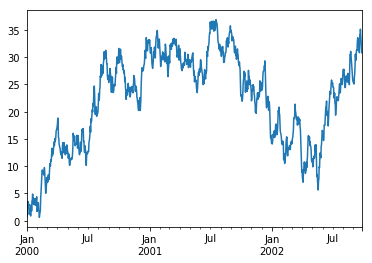

In [ ]:
ts.plot()

No DataFrame, a função plot() nos permite plotar todas as colunas com rótulos:

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [ ]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

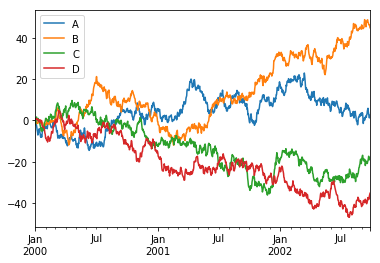

In [ ]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Escrevendo em um aquivo CSV](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [ ]:
df.to_csv('foo.csv')

[Lendo de um arquivo csv](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [ ]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.477020,-0.527529,-0.036027,0.784341
1,2000-01-02,-0.311771,-1.098093,-1.543949,0.592547
2,2000-01-03,-1.253529,-1.646134,0.226626,0.632994
3,2000-01-04,-2.552555,-0.401140,1.407640,0.666701
4,2000-01-05,-2.442198,-0.606283,1.606549,0.476352
5,2000-01-06,-3.694426,-1.054839,0.633908,0.787278
6,2000-01-07,-4.833544,-1.097215,0.214558,0.452135
7,2000-01-08,-5.633861,-1.555339,0.522771,0.556776
8,2000-01-09,-7.107693,-1.377898,0.857425,0.081930
9,2000-01-10,-5.168906,-0.670639,0.925410,-0.312119


### HDF5
Lendo e escrevendo em [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Escrevendo em um HDF5

In [ ]:
df.to_hdf('foo.h5','df')

Lendo de um HDF5 

In [ ]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-1.477020,-0.527529,-0.036027,0.784341
2000-01-02,-0.311771,-1.098093,-1.543949,0.592547
2000-01-03,-1.253529,-1.646134,0.226626,0.632994
2000-01-04,-2.552555,-0.401140,1.407640,0.666701
2000-01-05,-2.442198,-0.606283,1.606549,0.476352
2000-01-06,-3.694426,-1.054839,0.633908,0.787278
2000-01-07,-4.833544,-1.097215,0.214558,0.452135
2000-01-08,-5.633861,-1.555339,0.522771,0.556776
2000-01-09,-7.107693,-1.377898,0.857425,0.081930
2000-01-10,-5.168906,-0.670639,0.925410,-0.312119


### Excel

Lendo e escrevendo arquivos do [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Escrevendo em um arquvio excel

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Lendo de um arquivo excel

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])